In [1]:
import numpy as np
import matplotlib.pyplot as plt, matplotlib.colors as colors
from matplotlib.gridspec import GridSpec
import seaborn as sns
import pandas as pd
import constants, os, math
import Plotting as pl

In [3]:
folder = constants.folder
nameBase= folder.format('')
species=['CH3OH','#CH3OH']

df_sh = pl.buildDataframe(constants.SHOCK, constants.folder, constants.physical, species, singleDf=True)
df_hc = pl.buildDataframe(constants.HOTCORE, constants.folder, constants.physical, species, singleDf=True)
df_db = pl.buildDataframe([constants.SHOCK, constants.HOTCORE], constants.folder, constants.physical, species, singleDf=False)

In [20]:
df=pl.buildDataframe(constants.HOTCORE, constants.folder, constants.physical, species, singleDf=True)
tipo=constants.HOTCORE

In [23]:
max_meth_df = df.loc[df.groupby('runName')['CH3OH'].idxmax()]
merged_df = df.merge(max_meth_df[['runName', 'Time']], on='runName', suffixes=('', '_max_meth'))
min_ftemp_df = df.loc[df.groupby('runName')['gasTemp'].idxmax()]
merged_df = merged_df.merge(min_ftemp_df[['runName', 'Time']], on='runName', suffixes=('', '_min_ftemp'))
df = merged_df[merged_df['Time'] <= merged_df[['Time_max_meth','Time_min_ftemp']].max(axis=1)].drop(columns=['Time_max_meth','Time_min_ftemp'])

In [24]:
df

,Time,Density,gasTemp,av,zeta,radfield,CH3OH,#CH3OH,runName,Time_log,...,zeta_log,radfield_log,CH3OH_log,#CH3OH_log,cosmicRay,interstellarRad,iDens,fTemp,normalizedTime,normalizedTime_log
0,0.000000e+00,100000000.0,15.0,96440.00,1000.0,1000.0,7.634490e-10,2.737460e-07,1000.0_1000.0_100000000.0_300.0.dat,-inf,...,3.0,3.0,-9.117220,-6.562652,1000.0,1000.0,100000000.0,300.0,0.000000e+00,-inf
1,1.000000e-07,100000000.0,15.0,96440.00,1000.0,1000.0,7.634490e-10,2.740980e-07,1000.0_1000.0_100000000.0_300.0.dat,-7.000000,...,3.0,3.0,-9.117220,-6.562094,1000.0,1000.0,100000000.0,300.0,1.000000e-13,-13.000000
2,1.000000e-06,100000000.0,15.0,96440.00,1000.0,1000.0,7.634490e-10,2.742210e-07,1000.0_1000.0_100000000.0_300.0.dat,-6.000000,...,3.0,3.0,-9.117220,-6.561899,1000.0,1000.0,100000000.0,300.0,1.000000e-12,-12.000000
3,1.000000e-05,100000000.0,15.0,96440.00,1000.0,1000.0,7.634490e-10,2.742210e-07,1000.0_1000.0_100000000.0_300.0.dat,-5.000000,...,3.0,3.0,-9.117220,-6.561899,1000.0,1000.0,100000000.0,300.0,1.000000e-11,-11.000000
4,1.000000e-04,100000000.0,15.0,96440.00,1000.0,1000.0,7.634490e-10,2.742210e-07,1000.0_1000.0_100000000.0_300.0.dat,-4.000000,...,3.0,3.0,-9.117220,-6.561899,1000.0,1000.0,100000000.0,300.0,1.000000e-10,-10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,9.601000e+05,1000000.0,50.0,966.37,10.0,1000.0,5.731890e-08,3.255850e-07,10.0_1000.0_1000000.0_50.0.dat,5.982316,...,1.0,3.0,-7.241702,-6.487336,10.0,1000.0,1000000.0,50.0,9.601000e-01,-0.017684
3751,9.701000e+05,1000000.0,50.0,966.37,10.0,1000.0,5.765620e-08,3.255820e-07,10.0_1000.0_1000000.0_50.0.dat,5.986817,...,1.0,3.0,-7.239154,-6.487340,10.0,1000.0,1000000.0,50.0,9.701000e-01,-0.013183
3752,9.801000e+05,1000000.0,50.0,966.37,10.0,1000.0,5.799100e-08,3.255800e-07,10.0_1000.0_1000000.0_50.0.dat,5.991270,...,1.0,3.0,-7.236639,-6.487342,10.0,1000.0,1000000.0,50.0,9.801000e-01,-0.008730
3753,9.901000e+05,1000000.0,50.0,966.37,10.0,1000.0,5.832340e-08,3.255770e-07,10.0_1000.0_1000000.0_50.0.dat,5.995679,...,1.0,3.0,-7.234157,-6.487346,10.0,1000.0,1000000.0,50.0,9.901000e-01,-0.004321


In [ ]:
dfs={constants.HOTCORE: df_hc, constants.SHOCK: df_sh}
cols=['gasTemp', 'Density', 'av']
nCol=6
nRow=6

for i, tipo in enumerate([constants.SHOCK, constants.HOTCORE]):
    df=dfs[tipo]
    fig, axs = plt.subplots(nRow, nCol, figsize=(8*nCol,6*nRow*2))
    fig.subplots_adjust(top=0.98, wspace=0.15, hspace=0.3)
    fig.suptitle(tipo, size='xx-large', y=1)

    for i in range(nCol):
        for j in range(nRow):
            tdf=df[df['runName']==df['runName'][j+5*i]]
            ax=axs[i][j]

            for col in cols:
                ax.plot(tdf['Time_log'], tdf[col], label=None if i>0 and j>0 else col)
                ax.set_yscale('log')
            
            ax.set_title(df['runName'][j+5*i])
            ax.set_xlabel('Time_log')
            # ax.set_ybound(0,1e4)
    axs[0][0].legend()

In [7]:
species=['CH3OH','#CH3OH']
folder = constants.folder
nameBase= folder.format('Plots/')
tipo=constants.SHOCK

In [11]:
df_sh = pl.buildDataframe(constants.SHOCK, constants.folder, constants.physical, species, singleDf=True)
for runN in df_sh['runName'].unique():
    print('_'.join([nameBase+tipo.replace(' ','').upper(),constants.CONTINUITY,runN.strip('.dat')])+'.png')

/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_10.0_1000.0_1000.0_40.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_10.0_1000.0_10000.0_25.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_1000.0_3.0_1000.0_40.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_1000.0_3.0_100000.0_25.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_10.0_1000.0_1000.0_10.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_10.0_3.0_1000.0_25.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_1000.0_1000.0_1000.0_40.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_10.0_1000.0_10000.0_40.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_10.0_1000.0_10000.0_10.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_1000.0_3.0_10000.0_40.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_10.0_1000.0_100000.0_25.0

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

backend = mpl.get_backend()
mpl.use('agg')

tipo=constants.SHOCK
df=df_sh

cols=['gasTemp', 'Density', 'av']
species=['CH3OH','#CH3OH']
colors=['#ca1551','#054a29','#4cb944','#e6b40f','#8c001a']

atup=[]

for i in range(6):
    fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)

    fig.subplots_adjust(top=0.95, hspace=0.05)

    tdf=df[df['runName']==df['runName'][i]]

    ax=axs[1]
    for i,col in enumerate(cols):
        ax.plot(tdf['Time_log'], tdf[col], label=col, c=['#ca1551','#1f7a8c','#884ab2'][i])
        
    fig.suptitle(df['runName'][i])
    ax.set_yscale('log')
    ax.set_xlabel('Time_log')

    ax=axs[0]
    for j,col in enumerate(species):
        ax.plot(tdf['Time_log'], tdf[col], label=col, c=['#4cb944','#e76f51'][j])
    ax.set_yscale('log')
    ax.set_ybound(1e-14,1e-4)

    fig.legend(ncols=5, loc='lower center')
    fig.savefig('test.png')

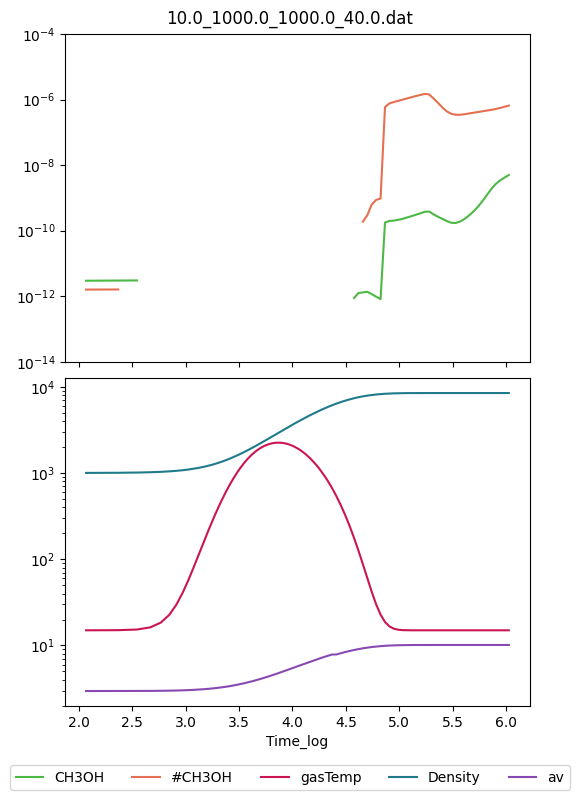

In [74]:
tipo=constants.SHOCK
df=df_sh

cols=['gasTemp', 'Density', 'av']
species=['CH3OH','#CH3OH']
colors=['#ca1551','#054a29','#4cb944','#e6b40f','#8c001a']

fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)
fig.subplots_adjust(top=0.95, hspace=0.05)

tdf=df[df['runName']==df['runName'][0]]

ax=axs[1]
for i,col in enumerate(cols):
    ax.plot(tdf['Time_log'], tdf[col], label=col, c=['#ca1551','#1f7a8c','#884ab2'][i])
    
fig.suptitle(df['runName'][0])
ax.set_yscale('log')
ax.set_xlabel('Time_log')

ax=axs[0]
for j,col in enumerate(species):
    ax.plot(tdf['Time_log'], tdf[col], label=col, c=['#4cb944','#e76f51'][j])
ax.set_yscale('log')
ax.set_ybound(1e-14,1e-4)

fig.legend(ncols=5, loc='lower center')

In [6]:
df=pl.localAbundanceDataframe(df_db, species, constants.physical, constants.BOTH, momento=constants.ALL, singleDf=False)

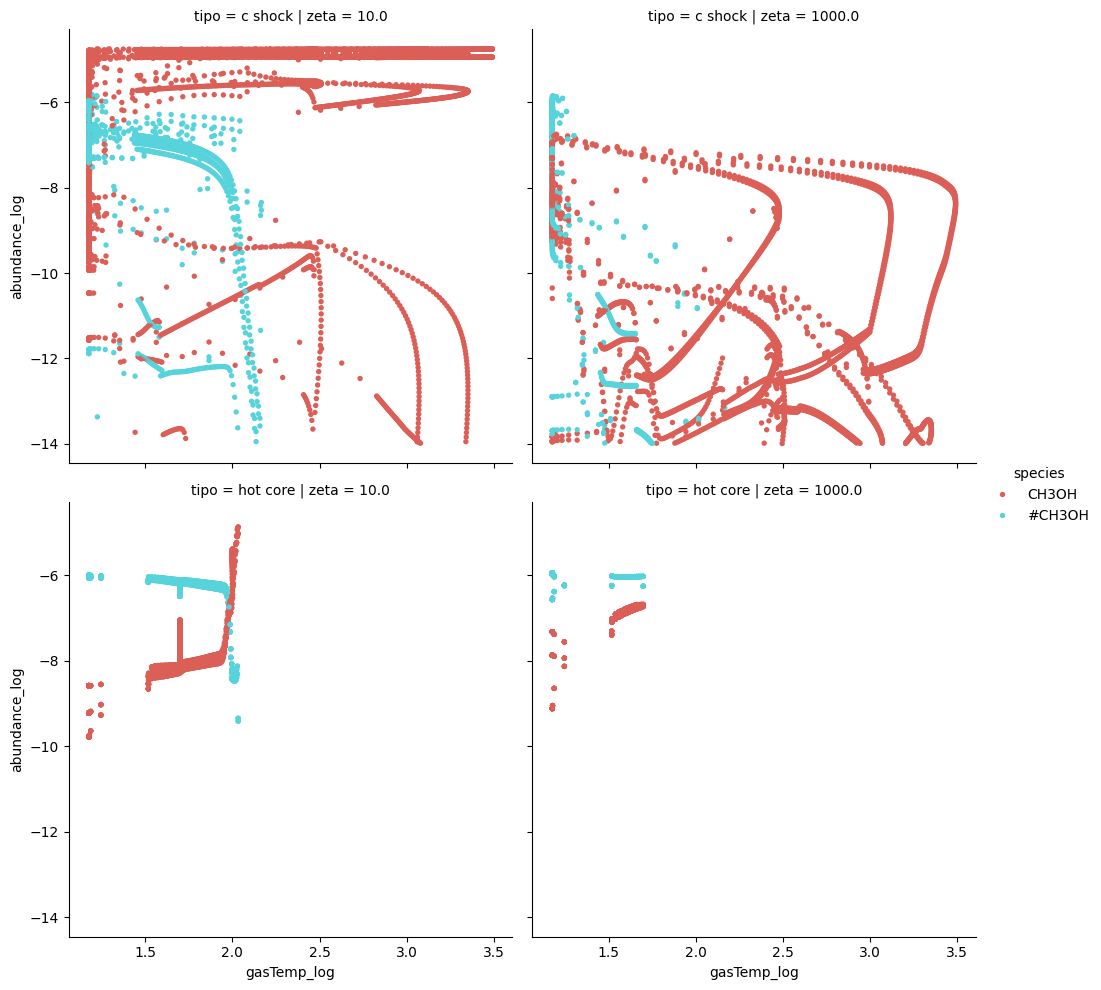

In [10]:
sns.relplot(data=df, x='gasTemp'+'_log', y='abundance'+'_log', hue='species',
            row='tipo', col='zeta', 
            palette='hls',
            legend='auto', kind='scatter', s=15, linewidth=0)